In [2]:
# -q (quiet) 옵션은 설치 로그를 안보여줌(조용히함)
%pip install -q seaborn


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
# 타이타닉(데이터 프레임 ) 데이터셋 불러오기
# (pandas에 기본 내장된 예제 데이터셋)
import seaborn as sns
import pandas as pd

# titanic 데이터 DataFrame
titanic = sns.load_dataset('titanic')

# 처음 5개 행 보기
print("타이타닉 데이터 미리보기:")
print(titanic.head())

# 데이터셋 정보 확인
print("\n데이터셋 정보:")
print(titanic.info())

# 데이터 요약 통계
print("\n데이터 요약 통계:")
print(titanic.describe())


타이타닉 데이터 미리보기:
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  

데이터셋 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0 

###주어진 타이타닉 데이터셋의 변수명 정리 

* **`survived`**: 생존 여부 (0: 사망, 1: 생존)
* **`pclass`**: 승객 등급 (1: 1등석, 2: 2등석, 3: 3등석)
* **`sex`**: 성별 (male: 남성, female: 여성)
* **`age`**: 나이
* **`sibsp`**: 함께 탑승한 형제/자매 또는 배우자의 수
* **`parch`**: 함께 탑승한 부모 또는 자녀의 수
* **`fare`**: 요금
* **`embarked`**: 승선항 (C: Cherbourg, Q: Queenstown, S: Southampton)
* **`class`**: 승객 등급 (`pclass`와 같은 정보지만, 데이터 타입이 'category'로 다름)
* **`who`**: 성인 남성, 여성 또는 아동 ('man', 'woman', 'child')
* **`adult_male`**: 성인 남성 여부 (`True` 또는 `False`)
* **`deck`**: 선실 데크 (갑판) 번호
* **`embark_town`**: 승선 도시
* **`alive`**: 생존 여부 ('yes' 또는 'no')
* **`alone`**: 혼자 탑승했는지 여부 (`True` 또는 `False`)

In [4]:
# Col 결측치 합계  
df = titanic
titanic.isnull().sum()
# 승객 등급 등장 빈도 (1, 2, 3 등석)
df['class'].value_counts()[0:3]
# 성별 빈도(남/녀)
df['sex'].value_counts()
# 생존 여부 빈도(생존자/사망자)
df['alive'].value_counts()

print(df)

     survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  alo

In [5]:
#성별에 따른 생존율 survived 
survival_rate = df.groupby('sex')['survived'].mean()
#더 복잡한 톡예 가능 
titanic.groupby('sex').agg({'survived':['mean']})
#승객 등급에 따른 생존율 
survival_rate1 = df.groupby('pclass')['survived'].mean()
print(survival_rate, survival_rate1)
#전체 인원중 생존자 수 

sex
female    0.742038
male      0.188908
Name: survived, dtype: float64 pclass
1    0.629630
2    0.472826
3    0.242363
Name: survived, dtype: float64


In [6]:
# 성별 & 승객 등급에 따른 생존
titanic.groupby(['sex', 'pclass'])['survived'].mean()

#피벗테이블 
titanic.pivot_table(
    values='survived',
    index='sex',
    columns='pclass',
    aggfunc='mean'
)
# 나이 그룹별 생존율 
titanic['age_group']= pd.cut(
    titanic['age'],
    bins=[0, 12, 18, 35, 60, 100,200], #0~12는 아동이고..
    labels=['아동', '청소년', '청년', '중장년', '노년','불사'] #초과~이하 

)
titanic.head(3)

#카테고리가 있는데 해당되는 내용이 없을 때/ observed 옵션
titanic.groupby('age_group',observed=True)['survived'].mean()
print(titanic.groupby('age_group',observed=True)['survived'].mean())

#성별 +나이그룹으로 생존율 확인


titanic.groupby(['sex', 'age_group'])['survived'].mean()

titanic.pivot_table(
    values='survived',
    index='age_group',
    columns='pclass',
    aggfunc='mean'
)
# 나이 그



age_group
아동     0.579710
청소년    0.428571
청년     0.382682
중장년    0.400000
노년     0.227273
Name: survived, dtype: float64


/var/folders/98/vj3q9b254k79y681ng12dddh0000gn/T/ipykernel_80110/3045875376.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  titanic.groupby(['sex', 'age_group'])['survived'].mean()
/var/folders/98/vj3q9b254k79y681ng12dddh0000gn/T/ipykernel_80110/3045875376.py:29: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  titanic.pivot_table(


pclass,1,2,3
age_group,,,
아동,0.750000,1.000000,0.416667
청소년,0.916667,0.500000,0.282609
청년,0.757576,0.436170,0.232323
중장년,0.611111,0.382979,0.086207
노년,0.214286,0.333333,0.200000


In [7]:
titanic = sns.load_dataset('titanic')
#결측치 확인 
missing = titanic.isna().sum()
#결측이 있는 항목만 확인 
missing[missing > 0]
#결측비율 
titanic.isna().mean() * 100


survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

In [8]:
# 결측치 채우기 
# age: 중요한 정보: 평균/ 중앙값 대체
#embarked : 가장 많은 사람들이 탄 곳으로 대체 edck: 
#deck 추측 불가능 (의미 없음) ->삭제 

#필요하다면, 카피떠서 진행 
titanic_processed =titanic.copy()

#나이 결측치 채우기 (남녀상관없이 전체 평균으로 채움)
mean_age = titanic['age'].mean()
titanic_processed['age'] = titanic['age'].fillna(mean_age)
#비어있던 행 마스킹
mask = titanic['age'].isna() 
titanic['age'].isna() .sum()

#평균으로 채워진 값들만 확인
titanic_processed.loc[mask]



,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
5,0,3,male,29.699118,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
17,1,2,male,29.699118,0,0,13.0000,S,Second,man,True,NaN,Southampton,yes,True
19,1,3,female,29.699118,0,0,7.2250,C,Third,woman,False,NaN,Cherbourg,yes,True
26,0,3,male,29.699118,0,0,7.2250,C,Third,man,True,NaN,Cherbourg,no,True
28,1,3,female,29.699118,0,0,7.8792,Q,Third,woman,False,NaN,Queenstown,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,0,3,male,29.699118,0,0,7.2292,C,Third,man,True,NaN,Cherbourg,no,True
863,0,3,female,29.699118,8,2,69.5500,S,Third,woman,False,NaN,Southampton,no,False
868,0,3,male,29.699118,0,0,9.5000,S,Third,man,True,NaN,Southampton,no,True
878,0,3,male,29.699118,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True


In [9]:
#성별/객실 별로 평균을 추정하는 건??

#모든 사람들을 성별과 객실 그룹의 평균나이로 바꾼 Series
mean_ages = titanic.groupby(['sex', 'pclass'])['age'].transform('mean')

#titanic 의 age col 중 빈 값만, mean_age 로 채움 
titanic_processed['age'] = titanic['age'].fillna(mean_ages)

titanic_processed.loc[titanic['age'].isna()]
#원래 비어있던 애들만 확인 



,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
5,0,3,male,26.507589,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
17,1,2,male,30.740707,0,0,13.0000,S,Second,man,True,NaN,Southampton,yes,True
19,1,3,female,21.750000,0,0,7.2250,C,Third,woman,False,NaN,Cherbourg,yes,True
26,0,3,male,26.507589,0,0,7.2250,C,Third,man,True,NaN,Cherbourg,no,True
28,1,3,female,21.750000,0,0,7.8792,Q,Third,woman,False,NaN,Queenstown,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,0,3,male,26.507589,0,0,7.2292,C,Third,man,True,NaN,Cherbourg,no,True
863,0,3,female,21.750000,8,2,69.5500,S,Third,woman,False,NaN,Southampton,no,False
868,0,3,male,26.507589,0,0,9.5000,S,Third,man,True,NaN,Southampton,no,True
878,0,3,male,26.507589,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True


In [10]:
#embarked (탑승도시) ->최빈값 (가장 많이 탄 곳)

#비어 있는 항구 개수 
titanic['embarked'].isna().sum()
#최빈값 (Series - 벡터)
mode_embarked = titanic['embarked'].mode()[0] #Series 에서 1개 뽑기 
#빈 값은 최빈값으로 교체 
titanic_processed['embarked'] = titanic['embarked'].fillna(mode_embarked)

#처리 완료 확인(빈값0개)
titanic_processed['embarked'].isna().sum()


np.int64(0)

In [11]:
# dec =k 은 77% 가 비어있음-> 삭제 
titanic['deck'].isna().mean() * 100  #빈값 비율 
#'deck'컴럼은 삭제
titanic_processed.drop('deck',axis=1,inplace= True)
titanic_processed.info

<bound method DataFrame.info of      survived  pclass     sex    age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.00      1      0   7.2500        S   Third   
1           1       1  female  38.00      1      0  71.2833        C   First   
2           1       3  female  26.00      0      0   7.9250        S   Third   
3           1       1  female  35.00      1      0  53.1000        S   First   
4           0       3    male  35.00      0      0   8.0500        S   Third   
..        ...     ...     ...    ...    ...    ...      ...      ...     ...   
886         0       2    male  27.00      0      0  13.0000        S  Second   
887         1       1  female  19.00      0      0  30.0000        S   First   
888         0       3  female  21.75      1      2  23.4500        S   Third   
889         1       1    male  26.00      0      0  30.0000        C   First   
890         0       3    male  32.00      0      0   7.7500        Q   Third   

       

In [12]:
titanic_processed.info

<bound method DataFrame.info of      survived  pclass     sex    age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.00      1      0   7.2500        S   Third   
1           1       1  female  38.00      1      0  71.2833        C   First   
2           1       3  female  26.00      0      0   7.9250        S   Third   
3           1       1  female  35.00      1      0  53.1000        S   First   
4           0       3    male  35.00      0      0   8.0500        S   Third   
..        ...     ...     ...    ...    ...    ...      ...      ...     ...   
886         0       2    male  27.00      0      0  13.0000        S  Second   
887         1       1  female  19.00      0      0  30.0000        S   First   
888         0       3  female  21.75      1      2  23.4500        S   Third   
889         1       1    male  26.00      0      0  30.0000        C   First   
890         0       3    male  32.00      0      0   7.7500        Q   Third   

       

In [13]:
# 타이타닉 데이터셋 불러오기
# (seaborn 기본 내장된 예제 데이터셋)
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore', category=UserWarning)

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# titanic 데이터 DataFrame
titanic = sns.load_dataset('titanic')

# 수치 데이터에만 집중
numeric_cols = ['age', 'fare']
print("타이타닉 데이터셋 기본 정보:")
print(titanic[numeric_cols].describe())

타이타닉 데이터셋 기본 정보:
              age        fare
count  714.000000  891.000000
mean    29.699118   32.204208
std     14.526497   49.693429
min      0.420000    0.000000
25%     20.125000    7.910400
50%     28.000000   14.454200
75%     38.000000   31.000000
max     80.000000  512.329200


findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

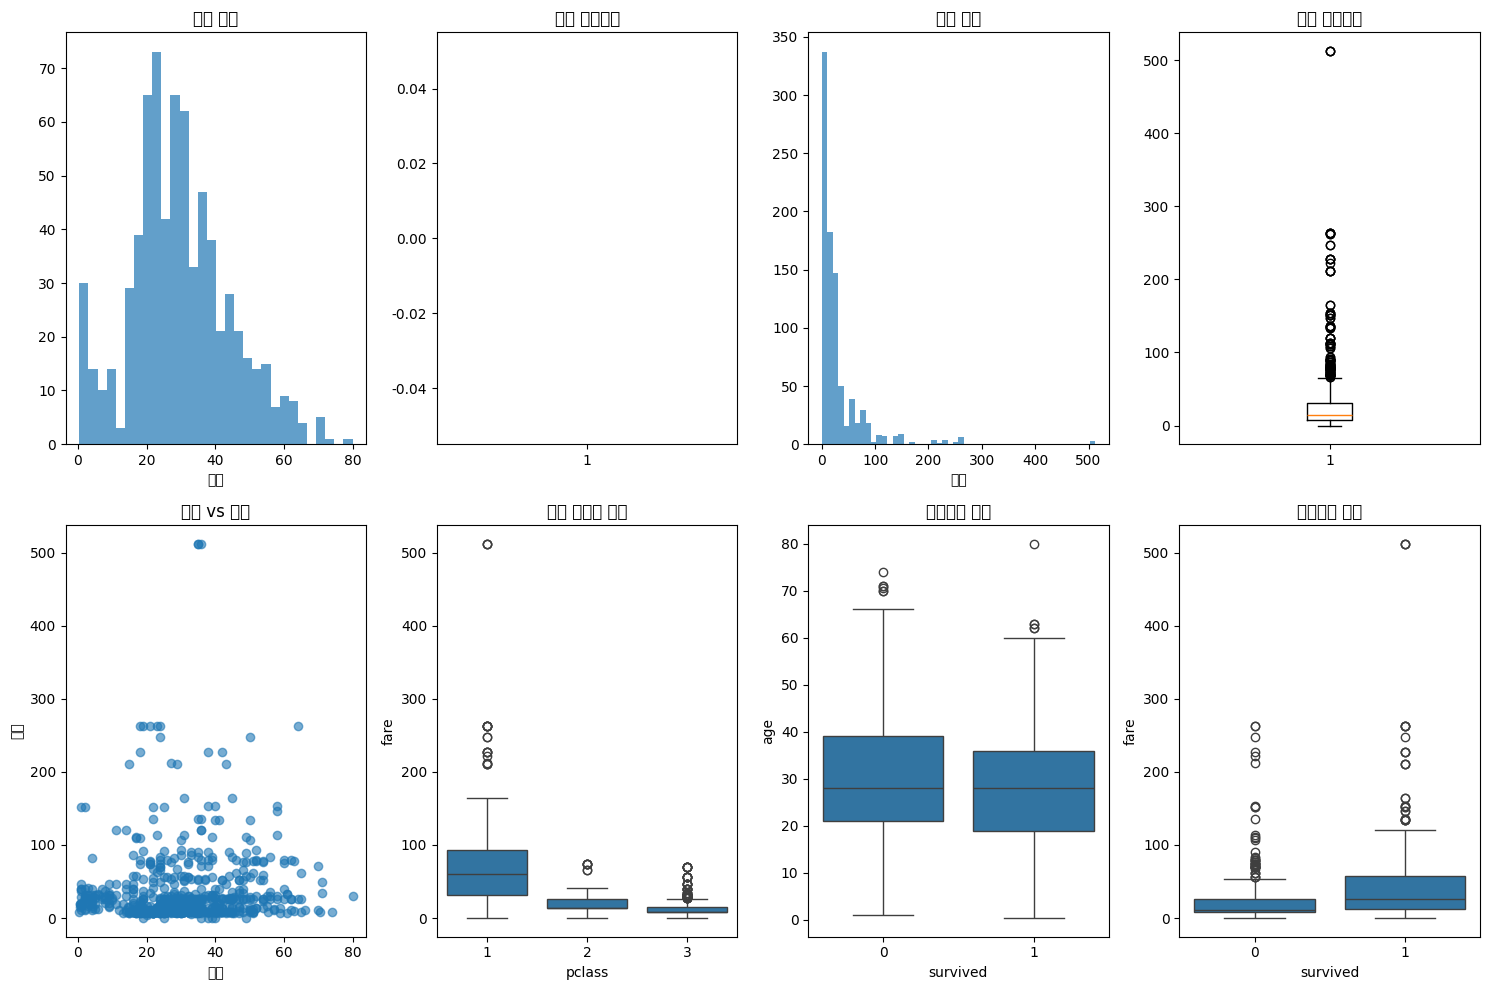

In [14]:
# 결측치 처리 안하면 제대로 시각화 제대로 안나옴

# 1. 이상치 탐지 및 시각화
plt.figure(figsize=(15, 10))

# 나이 분포
plt.subplot(2, 4, 1)
plt.hist(titanic['age'], bins=30, alpha=0.7)
plt.title('나이 분포')
plt.xlabel('나이')

plt.subplot(2, 4, 2)
plt.boxplot(titanic['age'])
plt.title('나이 박스플롯')

# 요금 분포
plt.subplot(2, 4, 3)
plt.hist(titanic['fare'], bins=50, alpha=0.7)
plt.title('요금 분포')
plt.xlabel('요금')

plt.subplot(2, 4, 4)
plt.boxplot(titanic['fare'])
plt.title('요금 박스플롯')

# 산점도
plt.subplot(2, 4, 5)
plt.scatter(titanic['age'], titanic['fare'], alpha=0.6)
plt.xlabel('나이')
plt.ylabel('요금')
plt.title('나이 vs 요금')

# 객실 등급별 요금 분포
plt.subplot(2, 4, 6)
sns.boxplot(x='pclass', y='fare', data=titanic)
plt.title('객실 등급별 요금')

# 생존자별 나이 분포
plt.subplot(2, 4, 7)
sns.boxplot(x='survived', y='age', data=titanic)
plt.title('생존자별 나이')

# 생존자별 요금 분포
plt.subplot(2, 4, 8)
sns.boxplot(x='survived', y='fare', data=titanic)
plt.title('생존자별 요금')

plt.tight_layout()
plt.show()

In [15]:
# 결측치처리 
# 모든 사람들을 성별/객실 그룹의 평균 나이로 바꾼 Serise 
tp = titanic .copy()
print(titanic.groupby(['sex','pclass'])['age'].mean())

#각 승객의 그룹에 맞춰서(상별 +객실등급) 헤딩 그룹의 평균으로  일괄 변결 
mean_ages = titanic.groupby(['sex', 'pclass'])['age'].transform('mean')
mean_ages
#titanic의 'age' col 중 빈 값만 , mean_ages로 채움.
tp['age'] = titanic['age'].fillna(mean_ages)
tp['age']


sex     pclass
female  1         34.611765
        2         28.722973
        3         21.750000
male    1         41.281386
        2         30.740707
        3         26.507589
Name: age, dtype: float64


0      22.00
1      38.00
2      26.00
3      35.00
4      35.00
       ...  
886    27.00
887    19.00
888    21.75
889    26.00
890    32.00
Name: age, Length: 891, dtype: float64

In [16]:
# 2. 요금 데이터의 이상치 분석
# IQR 방법으로 이상치 탐지
Q1 = tp['fare'].quantile(0.25)
Q3 = tp['fare'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

fare_outliers = (tp['fare'] < lower) | (tp['fare'] > upper)
# 전체 IQR 기준 이상치 개수 / 전체 개수 (%)
fare_outliers.sum() / fare_outliers.count() * 100


np.float64(13.019079685746352)

In [17]:

# 이상치에 해당하는 승객들 특성 분석
outliers_passengers = tp[fare_outliers]
# 객실 등급 분포
print(outliers_passengers['pclass'].value_counts())
# 성별 분포
print(outliers_passengers['sex'].value_counts())
# 생존 여부
print(outliers_passengers['survived'].value_counts())


pclass
1    104
3      7
2      5
Name: count, dtype: int64
sex
female    70
male      46
Name: count, dtype: int64
survived
1    79
0    37
Name: count, dtype: int64


In [18]:
#객실 등급을 고려한 이상치 분석 
#객실 등급별로  요금 이상치 탐지(전체 기준 이상치가 객실별로는 이상치 아닐 수 있음)
def detect_outliers_by_group(data: pd.DataFrame, group_col:str, value_col:str):
    """그룹별 이상치 탐지"""
    #먼저, 전원 모두 이상치가 아닌 경우 False 로 세팅 
    outliers =pd.Series(False,data.index) #빈시리즈 생성, 각 행이 이상치인지 기록할 이상치 판별 목록 
    #현재 group_col 기준 유니크한 데이터(pclass -> 1,2,3)
    for group in data[group_col].unique():
        group_data= data[data[group_col]==group][value_col] #group 값에 일치하는 행들만 필터링해서 부분 데이터 프레임을 만든다. 
        #해당 부분데이터프레임에서 이상치를 찾을 값 열만 선택하여 group data 변수에 저장한다.
        Q1 = group_data.quantile(0.25)        
        Q3 = group_data.quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        group_outliers = (group_data < lower) | (group_data > upper)
        outliers[group_data.index] = group_outliers #현재 그룹에 해당하는 인덱스 위치만 group_outlier에 덮어쓴다.


    return outliers


In [19]:
#겍실 등급별 이상한 사람들 (T/F mask series)
fare_outliers_by_pclass = detect_outliers_by_group(tp, 'pclass', 'fare') # tp 데이터프레임에서 ‘pclass’별로 ‘fare’ 열의 이상치를 찾아서, 그 결과를 fare_outliers_by_pclass에 저장
# 각 등급별로 따로 선별한 이상치 개수 
fare_outliers_by_pclass.sum()

np.int64(79)

In [20]:
#객실 등급 이상치 분석 방법 2
def detect_outlier_iqr(data_series):
    Q1 = data_series.quantile(0.25)
    Q3 = data_series.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - (1.5*IQR)
    upper_bound = Q3 + (1.5*IQR)
    return (data_series < lower_bound) | (data_series > upper_bound)

outlier_mask = titanic.groupby('pclass')['fare'].transform(detect_outlier_iqr)


In [21]:
# 타이타닉 데이터셋 불러오기
# (seaborn 기본 내장된 예제 데이터셋)
import seaborn as sns
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

# 한글 폰트 설정 (선택사항)
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.style.use('default')

# titanic 데이터 DataFrame
titanic = sns.load_dataset('titanic')

# 처음 5개 행 보기
print("타이타닉 데이터 미리보기:")
print(titanic.head())

# 데이터셋 정보 확인
print("\n데이터셋 정보:")
print(titanic.info())

# 데이터 요약 통계
print("\n데이터 요약 통계:")
print(titanic.describe())

# 메모리 사용량
print('/n메모리 사용량:')
print(titanic.memory_usage(deep=True).sum()/1024, 'mb')






타이타닉 데이터 미리보기:
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  

데이터셋 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0 

## 분석 목표
- 타이타닉 승객의 생존에 영향을 준 주요 요인 파악 
- 생존율 개선을 위한 안전 정책 수립근거 마련
- 위험 그룹 식별 및 우선 구조 대상 결정 

### 핵심 질문
1. 어떤 승객 특성이 생존에 가장 큰 영향을 미쳤는가?
2. 사회 경제적 지위가 생존에 영향을 미쳤는가?
3. 나이/ 성별에 따른 생존 패턴은 어떠한가?


In [22]:
# 타이타닉 데이터셋 불러오기
# (seaborn 기본 내장된 예제 데이터셋)
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore', category=UserWarning)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# titanic 데이터 DataFrame
titanic = sns.load_dataset('titanic')


#1. 기본정보 파악
# 처음 5개 행 보기
print("타이타닉 데이터 미리보기:")
print(titanic.head())

# 데이터셋 정보 확인
print("\n데이터셋 정보:")
print(titanic.info())

# 데이터 요약 통계
print("\n데이터 요약 통계:")
print(titanic.describe())

# 메모리 사용량
print('/n메모리 사용량:')
print(titanic.memory_usage(deep=True).sum()/1024, 'mb')



타이타닉 데이터 미리보기:
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  

데이터셋 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0 

In [23]:
#2. 생존률 기본 분석
print('---- 생존률 기본 분석 ----')
survival_rate = titanic['survived'].mean()
print( f'전체생존률: {survival_rate:.1%}')

# 생존자/사망자 분포
dead,survivor = titanic['survived'].value_counts()
print(f'생존자: {survivor}, 사망자: {dead}')

# # 시각화 
# fig, axes = plt.subplost(1, 2, figsize =(12,4))
# a1, a2 =axes
# #사망/ 생존자 파이그래프
# s_counts = titanic['survived'].value_counts()
# a1.pie(titanic['survived'].value_counts(), labels = ('사망자', '생존자'), autopct= '%1.1f%%')
# #생존자 막대그래프 



---- 생존률 기본 분석 ----
전체생존률: 38.4%
생존자: 342, 사망자: 549


In [24]:
print(df)

     survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  alo

In [25]:
#필요하다면, 결측치/이상치를 처리한다. 
print(df.isnull().sum())  # 컬럼별 결측치 수 확인
df1= df.copy()
df1
df1['age'].fillna(df1['age'].median(), inplace=True)#중간값으로 대체
df1['embarked'].fillna(df1['embarked'].mode()[0], inplace=True) #최빈값으로 대체
print(df1.isnull().sum()) 

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
age_group      177
dtype: int64
survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
age_group      177
dtype: int64


In [26]:
#핵심 변수별 생존률 분석

#1. 객실 등급별 생존률

# 객실 등급(Pclass)별 생존률 계산
survival_by_pclass = df1.groupby('pclass')['survived'].mean()
print(survival_by_pclass)

pclass
1    0.629630
2    0.472826
3    0.242363
Name: survived, dtype: float64


In [27]:
#2. 성별 생존률 
# 성별 생존률 계산
survival_by_sex = df1.groupby('sex')['survived'].mean()

print(survival_by_sex)

# 성별 생존자 수/ 전체 수 함꼐 보기
df.groupby('sex')['survived'].agg(['mean', 'sum', 'count'])

sex
female    0.742038
male      0.188908
Name: survived, dtype: float64


,mean,sum,count
sex,,,
female,0.742038,233,314
male,0.188908,109,577


findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.


agegroup
유아     0.593750
청소년    0.382609
성인     0.369565
노인     0.227273
Name: survived, dtype: float64


findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

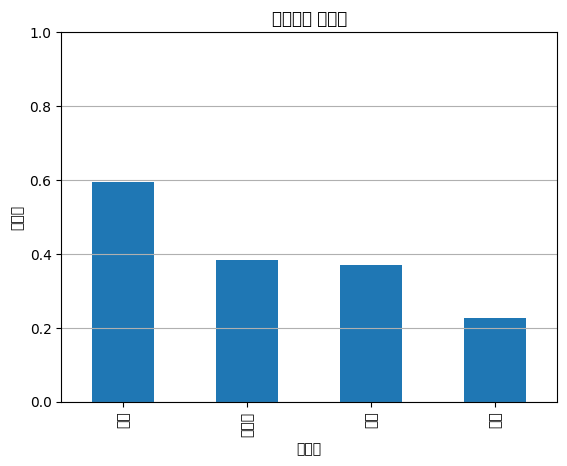

,mean,sum,count
agegroup,,,
유아,0.593750,38,64
청소년,0.382609,44,115
성인,0.369565,255,690
노인,0.227273,5,22


In [28]:
#3. 나이 생존률(연령대 별) 청년층.노년층.. 어떻게 분류하고 싶은지
# 나이 구간 설정
bins = [0, 10, 20, 60, 100]
labels = ['유아', '청소년', '성인', '노인']

# Age 열에 따라 'AgeGroup'이라는 새 열 추가
df1['agegroup'] = pd.cut(df1['age'], bins=bins, labels=labels, right=True)
# 생존률 계산
agegroup_survival = df1.groupby('agegroup')['survived'].mean()
print(agegroup_survival)


agegroup_survival.plot(kind='bar')
plt.title('나이대별 생존률')
plt.xlabel('나이대')
plt.ylabel('생존률')
plt.ylim(0, 1)
plt.grid(True, axis='y')
plt.show()

df1.groupby('agegroup')['survived'].agg(['mean', 'sum', 'count'])

In [29]:
df1

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_group,agegroup
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,청년,성인
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,중장년,성인
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,청년,성인
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,청년,성인
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,청년,성인
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,청년,성인
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,청년,청소년
888,0,3,female,28.0,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,NaN,성인
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,청년,성인


findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

sex     pclass
female  1         0.968085
        2         0.921053
        3         0.500000
male    1         0.368852
        2         0.157407
        3         0.135447
Name: survived, dtype: float64
pclass         1         2         3
sex                                 
female  0.968085  0.921053  0.500000
male    0.368852  0.157407  0.135447


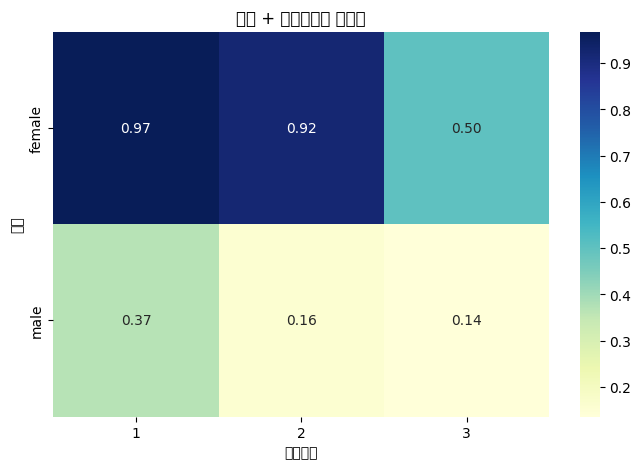

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

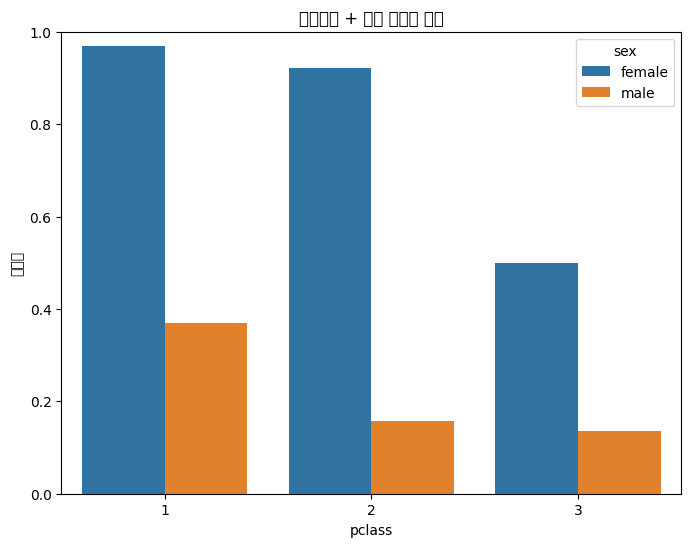

In [30]:
#4. 조합 분석: 성별 x 객실등급 
survival = df1.groupby(['sex', 'pclass'])['survived'].mean()
print(survival)

survival_table = df1.pivot_table(index='sex', columns='pclass', values='survived', aggfunc='mean')
print(survival_table)


# 피벗 테이블 생성 (성별 vs 객실등급)
pivot = df.pivot_table(index='sex', columns='pclass', values='survived', aggfunc='mean')

# 히트맵 시각화
plt.figure(figsize=(8, 5))
sns.heatmap(pivot, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('성별 + 객실등급별 생존률')
plt.xlabel('객실등급')
plt.ylabel('성별')
plt.show()

grouped = df.groupby(['sex', 'pclass'])['survived'].mean().reset_index()


plt.figure(figsize=(8, 6))
sns.barplot(data=grouped, x='pclass', y='survived', hue='sex')
plt.title('객실등급 + 성별 생존률 비교')
plt.ylabel('생존률')
plt.ylim(0, 1)
plt.show()

In [31]:
# 부모 또는 자식과 함께 탑승한 사람들(가족) 의 생존률 
df['with_family'] = df['parch'].apply(lambda x: '가족동반' if x > 0 else '혼자 또는 부부')
family_survival = df.groupby('with_family')['survived'].mean()
print(family_survival)

with_family
가족동반        0.511737
혼자 또는 부부    0.343658
Name: survived, dtype: float64


# 5. 분석 결과 보고(인사이트 정리)
1. 객실 등급이 높을수록 생존률이 높다는 경향이 있다. 
2. 여성의 생존률이 남성보다 '월등히' 높다 
3. 유아의 생존률이 높고, 노인의 생존률이 낮다.탑승자 수는 노인이 가장적고 성인이 가장 많다. 
4. 1등석 여성은 약 97% 생존했고 3등석 남성은 13 % 생존했다. --> 성별과 객실 등급 모두 생존률에 강한 영향을 준다
5. 아이를 가진 가족 단위가 생존한 승객이 생존률이 더 높음, 이는 구조시 우선권 또는 서로를 도운 행동

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

=== 객실 등급별 생존율 ===
1 등급: 63.0% - 136 / 216명
2 등급: 47.3% - 87 / 184명
3 등급: 24.2% - 119 / 491명
=== 성별 생존율 ===
female: 74.2% - 233 / 314명
male: 18.9% - 109 / 577명
=== 연령대별 생존율 ===
아동(-12): 58.0% - 40/69명
청소년(13-18): 42.9% - 30/70명
청년(19-35): 38.3% - 137/358명
중장년(36-60): 40.0% - 78/195명
노년(61+): 22.7% - 5/22명


findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

=== 성별 x 객실등급 교차분석 ===
pclass     1     2     3
sex                     
female  96.8  92.1  50.0
male    36.9  15.7  13.5


findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

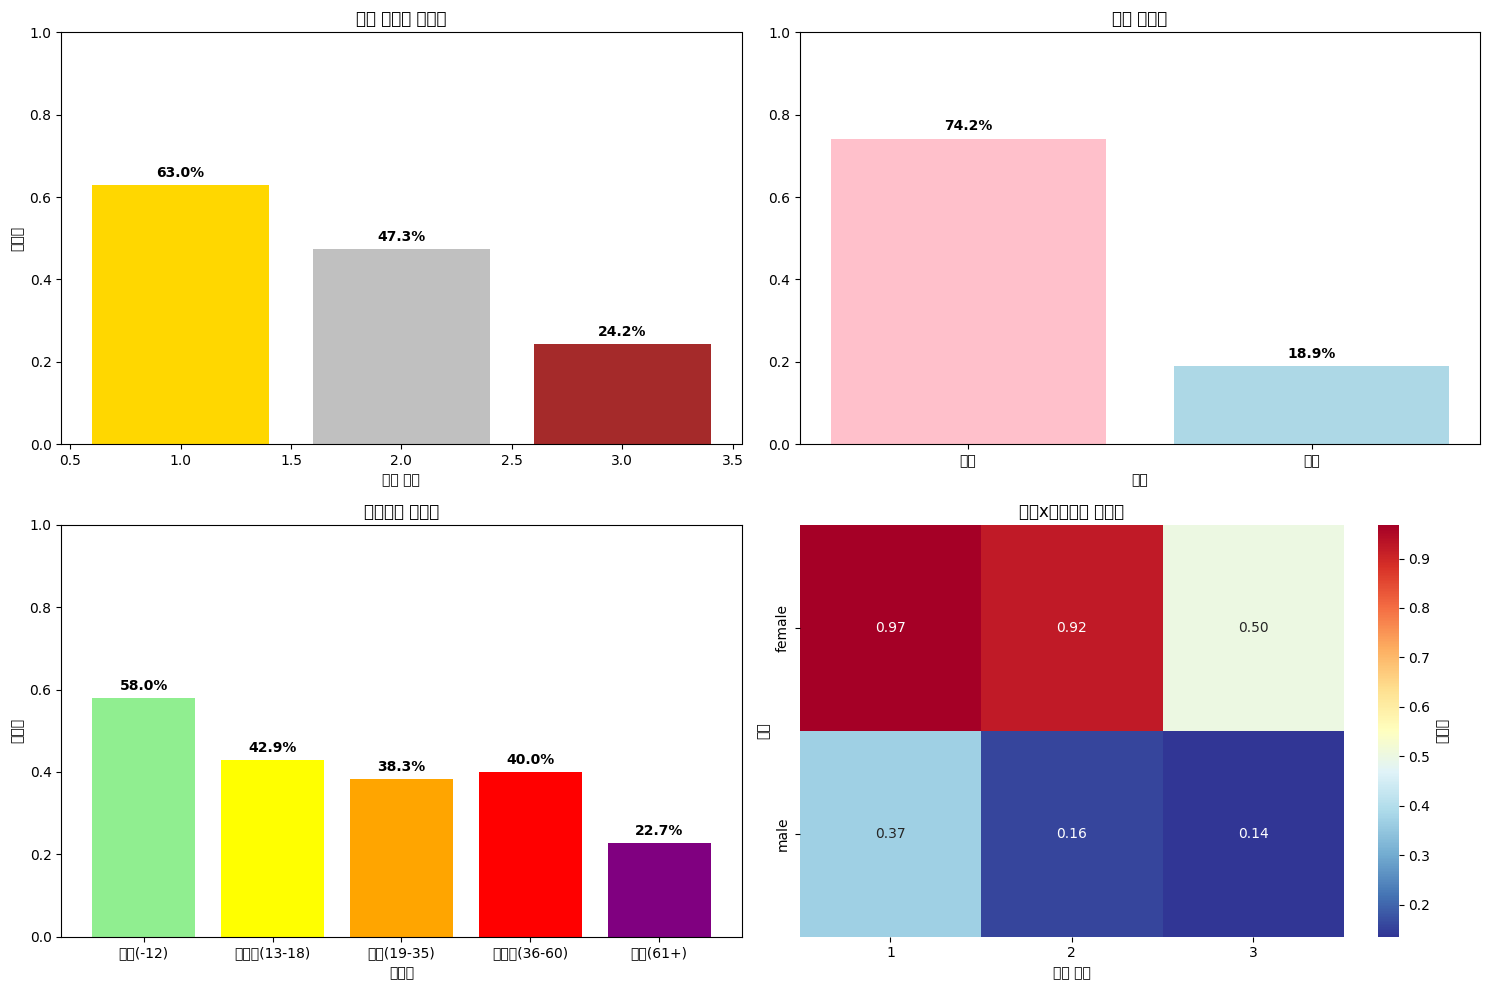

In [32]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
a1, a2, a3, a4 = axes[0, 0], axes[0, 1], axes[1, 0], axes[1, 1]

# 핵심 변수별 생존률 분석
# 1. 객실 등급별 생존률 (총원, 생존, 생존률)
pclass_survival = titanic.groupby('pclass')['survived'].agg(['count', 'sum', 'mean'])

a1.bar(pclass_survival.index, pclass_survival['mean'], color=['gold', 'silver', 'brown'])
a1.set_title('객실 등급별 생존율')
a1.set_xlabel('객실 등급')
a1.set_ylabel('생존율')
a1.set_ylim(0, 1)

for idx, value in enumerate(pclass_survival['mean']):
    #       x좌표,   y좌표
    a1.text(idx+1, value + 0.02, f'{value:.1%}', ha='center', fontweight='bold')

print('=== 객실 등급별 생존율 ===')
for idx, row in pclass_survival.iterrows():
    print(f'{idx} 등급: {row['mean']:.1%} - {row['sum'].astype(int)} / {row['count'].astype(int)}명')


# 1-1. 요금으로 insight를 뽑을 수 있을까? (돈을 특히 많이 낸 사람들의 생존률..?)

# 2. 성별 생존률
sex_survival = titanic.groupby('sex')['survived'].agg(['count', 'sum', 'mean'])
a2.bar(range(len(sex_survival)), sex_survival['mean'], color=['pink', 'lightblue'])
a2.set_title('성별 생존율')
a2.set_xlabel('성별')
a2.set_xticklabels(['여성', '남성'])
a2.set_xticks(range(len(sex_survival)))
a2.set_ylim(0, 1)

for idx, value in enumerate(sex_survival['mean']):
    a2.text(idx, value + 0.02, f'{value:.1%}', ha='center', fontweight='bold')

print('=== 성별 생존율 ===')
for idx, row in sex_survival.iterrows():
    print(f'{idx}: {row['mean']:.1%} - {row['sum'].astype(int)} / {row['count'].astype(int)}명')


# 3. 나이 생존률(연령대 별)
titanic['age_group'] = pd.cut(
    titanic['age'],
    bins=[0, 12, 18, 35, 60, 100,],  # 초과 ~ 이하
    labels=['아동(-12)', '청소년(13-18)', '청년(19-35)', '중장년(36-60)', '노년(61+)',]
)
age_survival = titanic.groupby('age_group')['survived'].agg(['count', 'sum', 'mean']).dropna()

a3.bar(range(len(age_survival)), age_survival['mean'], 
       color=['lightgreen', 'yellow', 'orange', 'red', 'purple'])
a3.set_title('연령대별 생존율')
a3.set_xlabel('연령대')
a3.set_xticks(range(len(age_survival)))
a3.set_xticklabels(age_survival.index)
a3.set_ylim(0, 1)
a3.set_ylabel('생존율')

for idx, value in enumerate(age_survival['mean']):
    a3.text(idx, value + 0.02, f'{value:.1%}', ha='center', fontweight='bold')

print('=== 연령대별 생존율 ===')
for idx, row in age_survival.iterrows():
    print(f'{idx}: {row['mean']:.1%} - {row['sum'].astype(int)}/{row['count'].astype(int)}명')


# 4. 조합 분석: 성별 x 객실등급 -> GroupBy 말고 Crosstab 으로 해보자
#               성별       x         객실등급 ,       생존              율
survival_ct = pd.crosstab(titanic['sex'], titanic['pclass'], titanic['survived'], aggfunc='mean')
sns.heatmap(survival_ct, annot=True, fmt='.2f', cmap='RdYlBu_r',
            ax=a4, cbar_kws={'label': '생존율'})
a4.set_title('성별x객실등급 생존율')
a4.set_xlabel('객실 등급')
a4.set_ylabel('성별')

print('=== 성별 x 객실등급 교차분석 ===')
print(survival_ct.round(3) * 100)

plt.tight_layout()
plt.show()

In [33]:
#5. 정리
from scipy.stats import chi2_contingency 

#카이제곱 독립성 검정 
sex_survival_ct= pd .crosstab(titanic['sex'], titanic['survived'])
chi2_contingency(sex_survival_ct)

'''
chi2 = 카이제곱 통계량(값이 클수록 기대와 관측의 차이가 크다 -> 통계적으로 유의할 가능성이 높다 ), 범주형 변수 간의 관계가 우연인지 유의미한지 판단하는데 사용된다. 
p_value = 유의 확률 (값이 작다 = 관련이 있다), 일반적으로 5% 보다 작으면 연관이 있다고 본다. 
dof = 자유도 
exepected = 기대빈도표(성별- 생존이 독립적일때 기대되는 값들)
카이제곱 분포의 정의 
'''


'\nchi2 = 카이제곱 통계량(값이 클수록 기대와 관측의 차이가 크다 -> 통계적으로 유의할 가능성이 높다 ), 범주형 변수 간의 관계가 우연인지 유의미한지 판단하는데 사용된다. \np_value = 유의 확률 (값이 작다 = 관련이 있다), 일반적으로 5% 보다 작으면 연관이 있다고 본다. \ndof = 자유도 \nexepected = 기대빈도표(성별- 생존이 독립적일때 기대되는 값들)\n카이제곱 분포의 정의 \n'